In [ ]:
pip install pgmpy

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install networkx

S este independent de M dat fiind L
O si L sunt conditionat independente de S(daca stim ca un email e spam, deja nu mai influenteaza ca un link e prezent sau invers)

In [15]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

#creez modelul bayesian cu relatiile respective
model = BayesianNetwork([("S", "O"), ("S", "L"), ("S", "M"), ("L", "M")])

#definesc distributiile conditionate de prob. pt S
#P(S=0)=0.6
cpd_s = TabularCPD("S", 2, [[0.6], [0.4]])

#distributia pt O|S
#S=0: P(O=0)=0.9, P(O=1)=0.1
cpd_o = TabularCPD(
    "O",
    2,
    [
        [0.9, 0.3] ,
        [0.1, 0.7]
    ],
    evidence=["S"],
    evidence_card=[2]
)

#distributia pt L|S
#S=0: P(L=0)=0.7, P(L=1)=0.3
cpd_l = TabularCPD(
    "L",
    2,
    [
        [0.7, 0.2],
        [0.3, 0.8]
    ],
    evidence=["S"],
    evidence_card=[2]
)

#distributia pt M|S,L
#S=0,L=0: P(M=0)=0.8, P(M=1)=0.2
#S=0,L=1: P(M=0)=0.4, P(M=1)=0.6
cpd_m = TabularCPD(
    "M",
    2,
    [
        [0.8, 0.4, 0.5, 0.1],
        [0.2, 0.6, 0.5, 0.9]
    ],
    evidence=["S", "L"],
    evidence_card=[2, 2]
)

#adaug prob.condit. in model
model.add_cpds(cpd_s, cpd_o, cpd_l, cpd_m)
#verific daca reteaua e valida
assert model.check_model()
#calculam probabilitati
inference = VariableElimination(model)

#calculez prob. ca S e spam cu dovezile date
prob_spam = inference.query(variables=['S'], evidence={'O': 1, 'L': 1, 'M': 1})
print("Probabilitatea ca e-mail-ul să fie spam:", prob_spam)


Probabilitatea ca e-mail-ul să fie spam: +------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0508 |
+------+----------+
| S(1) |   0.9492 |
+------+----------+


+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0508 |
+------+----------+
| S(1) |   0.9492 |
+------+----------+


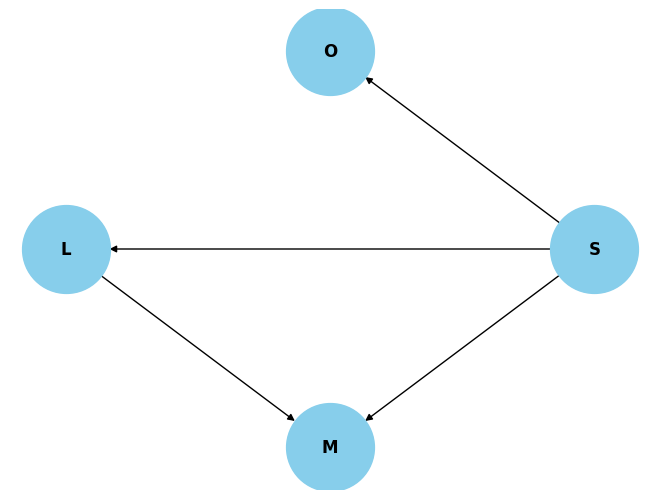

In [16]:
infer = VariableElimination(model)
result = infer.query(variables=['S'], evidence={'O': 1, 'L': 1, 'M': 1})
print(result)

#vizualizez reteaua bayesiana
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_size=4000, font_weight='bold', node_color='skyblue')
plt.show()